# Removendo outliers dos dados coletados na Loft

Este notebook é parte das tarefas do curso de Data Science da [Awari](https://awari.com.br/). **O objetivo deste projeto é remover os outliers do dataset construído com os dados de apartamentos em São Paulo coletados no site da Loft**.

O dataset utilizado já passou por um processo de limpeza e contém 16099 apartamentos detalhados por 6 atributos: preço, endereço, área, quartos, vagas e bairro.

Primeiro, verificamos outliers com relação à área dos apartamentos. O boxplot mostra que há ao menos um valor muito fora do esperado. 

Logo, utilizamos o método do intervalo interquartil ([interquartile range method](https://machinelearningmastery.com/how-to-use-statistics-to-identify-outliers-in-data/)). Definimos o [IQR](https://medium.com/analytics-vidhya/removing-outliers-understanding-how-and-what-behind-the-magic-18a78ab480ff) e o usamos para calcular o limite superior e o limite inferior do intervalo de áreas dos apartamentos para cada bairro. Assumimos como limite remover 5% dos dados por esse método. Caso a remoção exceda esse valor, não utilizamos o IQR, e removemos apenas os dados que estão além do percentil 99%.

Esse método é repetido para o preço dos apartamentos. Vemos pelos boxplots que, tanto para a área quanto para o preço, a distribuição dos dados ficou mais adequada para o uso em algorítmos de machine learning.

Avaliando os quartos e as vagas dos apartamentos, vemos que não há nenhum valor muito discrepante, de modo que não é necessário remover outliers nestes casos. 

O resultado final é que foram removidos 725 apartamentos pelo preço e outros 688 apartamentos pela área.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
dados = pd.read_csv(r'/Users/leuzinger/Dropbox/Data Science/Awari/Web Scraping/Loft/Dados_ap_clean.csv')

In [3]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16099 entries, 0 to 16098
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   preço (R$)  16099 non-null  float64
 1   endereço    16099 non-null  object 
 2   área (m2)   16099 non-null  int64  
 3   quartos     16099 non-null  int64  
 4   vagas       16099 non-null  int64  
 5   bairro      16099 non-null  object 
dtypes: float64(1), int64(3), object(2)
memory usage: 754.8+ KB


In [4]:
df = dados.copy()

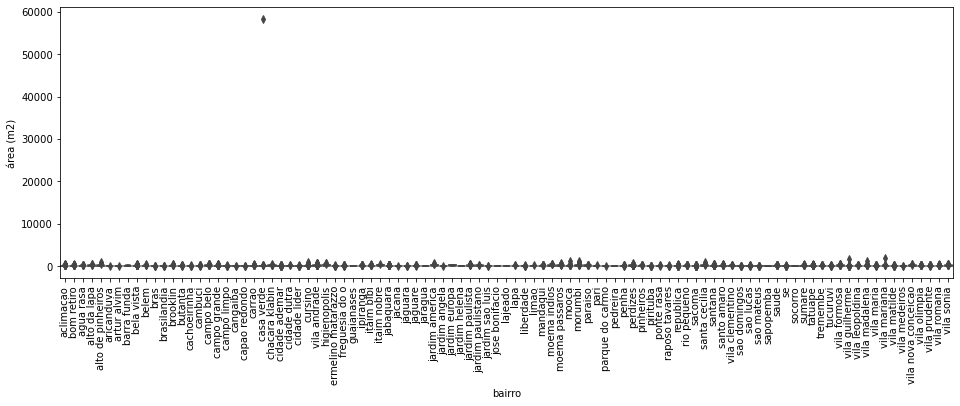

In [5]:
plt.figure(figsize=(16,5))
sns.boxplot(data=df[["bairro", "área (m2)"]], y="área (m2)", x="bairro")
plt.xticks(rotation=90)
plt.show()

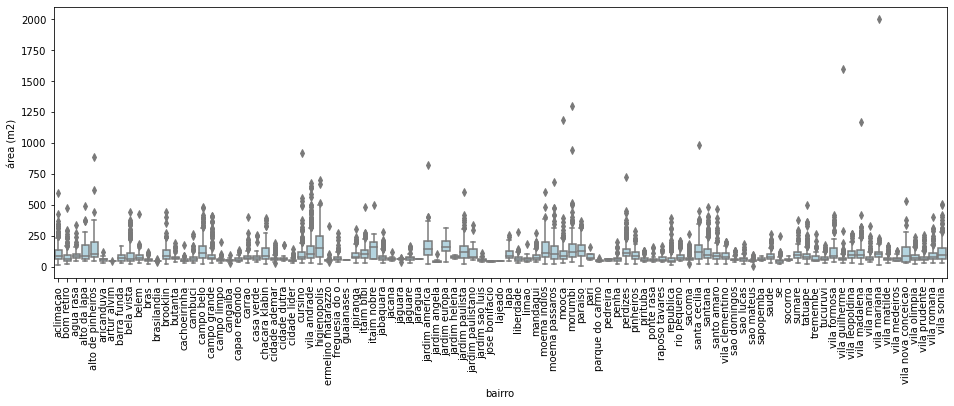

In [6]:
df = df.drop(index=df.loc[dados['área (m2)']>5000,:].index)
plt.figure(figsize=(16,5))
sns.boxplot(data=df[["bairro", "área (m2)"]], y="área (m2)", x="bairro",color='lightblue')
plt.xticks(rotation=90)
plt.show()

In [7]:
def remove_outliers(data, bairro, coluna, max_removidos):
    q1, q3 = data.loc[data["bairro"] == bairro, coluna].quantile([.25,.75])
    iqr = q3-q1
    lb = max(q1 - 1.5*iqr, 0)
    ub = q3 + 1.5*iqr
    len_before = sum(~data.loc[data["bairro"] == bairro, coluna].isnull())
    len_after = len(data.loc[(data["bairro"]==bairro) & (data[coluna].between(lb, ub)), coluna])
    removidos = 1-(len_after/len_before)
    print(f"{bairro}: \nremocao por iqr seria {removidos*100}%")
    if removidos < max_removidos:
        print(f"Lower bound: {lb}, upper bound: {ub}")
        print(f"Removidos por iqr: {removidos*100}%")
        data.loc[(data["bairro"]==bairro) & (~data[coluna].between(lb, ub)), coluna] = np.nan
    else:
        data = remove_outliers_percentis(data, bairro, coluna, lower_percentile=0, upper_percentile=(1-max_removidos))
    return data

In [8]:
def remove_outliers_percentis(data, bairro, coluna, lower_percentile=0.0, upper_percentile=.99):
    lb, ub = data.loc[data["bairro"]==bairro, coluna].quantile([lower_percentile, upper_percentile])
    len_before = sum(~data.loc[data["bairro"] == bairro, coluna].isnull())
    data.loc[(data["bairro"]==bairro) & (~data[coluna].between(lb, ub)), coluna] = np.nan
    len_after = sum(~data.loc[data["bairro"] == bairro, coluna].isnull())
    print(f"Lower bound: {lb}, upper bound: {ub}")
    print(f"Removidos por percentis: {(1-(len_after/len_before))*100}% dos dados")
    return data

In [9]:
for bairro in df["bairro"].unique():
    df = remove_outliers(df, bairro, "área (m2)", max_removidos=.05)

aclimacao: 
remocao por iqr seria 6.229508196721312%
Lower bound: 14.0, upper bound: 250.0
Removidos por percentis: 4.5901639344262275% dos dados
bom retiro: 
remocao por iqr seria 3.500000000000003%
Lower bound: 0, upper bound: 168.0
Removidos por iqr: 3.500000000000003%
agua rasa: 
remocao por iqr seria 3.296703296703296%
Lower bound: 10.5, upper bound: 164.5
Removidos por iqr: 3.296703296703296%
alto da lapa: 
remocao por iqr seria 10.256410256410254%
Lower bound: 43.0, upper bound: 367.4
Removidos por percentis: 5.128205128205132% dos dados
alto de pinheiros: 
remocao por iqr seria 4.61538461538461%
Lower bound: 0, upper bound: 380.0
Removidos por iqr: 4.61538461538461%
aricanduva: 
remocao por iqr seria 1.2820512820512775%
Lower bound: 24.5, upper bound: 92.5
Removidos por iqr: 1.2820512820512775%
artur alvim: 
remocao por iqr seria 25.0%
Lower bound: 45.0, upper bound: 45.849999999999994
Removidos por percentis: 25.0% dos dados
barra funda: 
remocao por iqr seria 0.0%
Lower bound

raposo tavares: 
remocao por iqr seria 7.8125%
Lower bound: 38.0, upper bound: 135.24999999999997
Removidos por percentis: 6.25% dos dados
republica: 
remocao por iqr seria 7.075471698113212%
Lower bound: 16.0, upper bound: 139.0
Removidos por percentis: 4.481132075471694% dos dados
rio pequeno: 
remocao por iqr seria 7.051282051282048%
Lower bound: 47.0, upper bound: 166.25
Removidos por percentis: 5.128205128205132% dos dados
sacoma: 
remocao por iqr seria 5.681818181818176%
Lower bound: 26.0, upper bound: 97.0
Removidos por percentis: 4.92424242424242% dos dados
santa cecilia: 
remocao por iqr seria 2.2471910112359605%
Lower bound: 0, upper bound: 357.75
Removidos por iqr: 2.2471910112359605%
santana: 
remocao por iqr seria 6.302521008403361%
Lower bound: 20.0, upper bound: 253.0
Removidos por percentis: 4.831932773109249% dos dados
santo amaro: 
remocao por iqr seria 4.240282685512364%
Lower bound: 0, upper bound: 196.0
Removidos por iqr: 4.240282685512364%
vila clementino: 
remoca

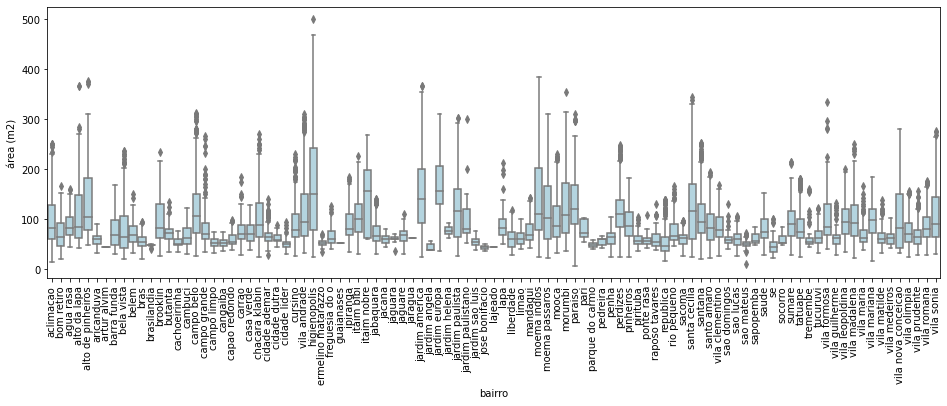

In [10]:
plt.figure(figsize=(16,5))
sns.boxplot(data=df[["bairro", "área (m2)"]], y="área (m2)", x="bairro",color='lightblue')
plt.xticks(rotation=90)
plt.show()

In [11]:
df["quartos"].value_counts(normalize=True)

2    0.411231
3    0.367685
1    0.126289
4    0.083427
0    0.006895
5    0.003851
6    0.000559
7    0.000062
Name: quartos, dtype: float64

In [12]:
df["vagas"].value_counts(normalize=True)

1    0.525158
2    0.242887
0    0.103802
3    0.080631
4    0.035532
5    0.009007
6    0.002857
7    0.000124
Name: vagas, dtype: float64

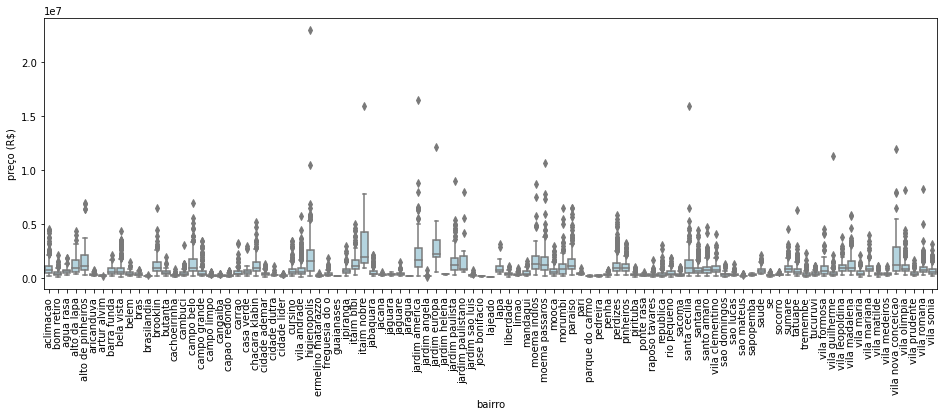

In [13]:
plt.figure(figsize=(16,5))
sns.boxplot(data=df[["bairro", "preço (R$)"]], y="preço (R$)", x="bairro",color='lightblue')
plt.xticks(rotation=90)
plt.show()

In [14]:
for bairro in df["bairro"].unique():
    df = remove_outliers(df, bairro, "preço (R$)", max_removidos=.05)

aclimacao: 
remocao por iqr seria 8.196721311475407%
Lower bound: 241970.0, upper bound: 2457424.0
Removidos por percentis: 5.245901639344264% dos dados
bom retiro: 
remocao por iqr seria 2.2499999999999964%
Lower bound: 0, upper bound: 1055750.0
Removidos por iqr: 2.2499999999999964%
agua rasa: 
remocao por iqr seria 1.6483516483516536%
Lower bound: 0, upper bound: 1324095.3625
Removidos por iqr: 1.6483516483516536%
alto da lapa: 
remocao por iqr seria 7.692307692307687%
Lower bound: 380000.0, upper bound: 3640000.0000000005
Removidos por percentis: 5.128205128205132% dos dados
alto de pinheiros: 
remocao por iqr seria 6.153846153846154%
Lower bound: 365000.0, upper bound: 5859999.999999992
Removidos por percentis: 6.153846153846154% dos dados
aricanduva: 
remocao por iqr seria 8.974358974358976%
Lower bound: 195000.0, upper bound: 651999.9999999993
Removidos por percentis: 5.128205128205132% dos dados
artur alvim: 
remocao por iqr seria 25.0%
Lower bound: 200000.0, upper bound: 29445

santana: 
remocao por iqr seria 7.98319327731093%
Lower bound: 230000.0, upper bound: 1900000.0
Removidos por percentis: 4.411764705882348% dos dados
santo amaro: 
remocao por iqr seria 4.59363957597173%
Lower bound: 0, upper bound: 1949750.0
Removidos por iqr: 4.59363957597173%
vila clementino: 
remocao por iqr seria 6.818181818181824%
Lower bound: 200000.0, upper bound: 2227499.999999997
Removidos por percentis: 5.681818181818176% dos dados
sao domingos: 
remocao por iqr seria 9.523809523809524%
Lower bound: 150000.0, upper bound: 1195000.0
Removidos por percentis: 6.349206349206349% dos dados
sao lucas: 
remocao por iqr seria 6.666666666666665%
Lower bound: 185000.0, upper bound: 672398.3929999998
Removidos por percentis: 5.000000000000004% dos dados
sao mateus: 
remocao por iqr seria 6.25%
Lower bound: 172000.0, upper bound: 364111.8035
Removidos por percentis: 5.000000000000004% dos dados
sapopemba: 
remocao por iqr seria 0.0%
Lower bound: 100950.08750000008, upper bound: 661029.9

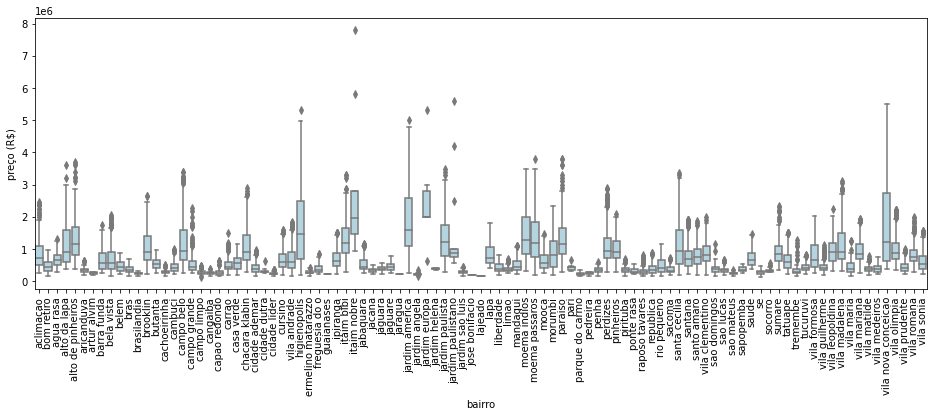

In [15]:
plt.figure(figsize=(16,5))
sns.boxplot(data=df[["bairro", "preço (R$)"]], y="preço (R$)", x="bairro",color='lightblue')
plt.xticks(rotation=90)
plt.show()

In [16]:
df.isnull().sum()

preço (R$)    725
endereço        0
área (m2)     687
quartos         0
vagas           0
bairro          0
dtype: int64

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16098 entries, 0 to 16098
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   preço (R$)  15373 non-null  float64
 1   endereço    16098 non-null  object 
 2   área (m2)   15411 non-null  float64
 3   quartos     16098 non-null  int64  
 4   vagas       16098 non-null  int64  
 5   bairro      16098 non-null  object 
dtypes: float64(2), int64(2), object(2)
memory usage: 1.4+ MB


In [18]:
len(df.dropna(subset=['preço (R$)', 'endereço', 'área (m2)', 'quartos', 'vagas', 'bairro']))/len(df)

0.9361411355447882

In [19]:
df.to_csv("dados_sem_outliers.csv", index=False)